In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [4]:
def calc_mse(y, y_pred):
  return np.mean((y - y_pred)**2)

In [5]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [6]:
X_st = X.copy().astype(np.float64)

In [7]:
X_st = np.concatenate(([X_st[0]], [calc_std_feat(x) for x in X_st[1:]]))

In [8]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

## 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [9]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    '''if i % (iterations / 10) == 0:
      print(i, W, err)'''
  return W

In [10]:
lambdas = [1e-8, 1e-4, 1e-3, 1e-2, 3*1e-2]

In [11]:
weights = [eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=l) for l in lambdas]
weights

[array([57.39999971,  6.12221264,  1.42879223,  4.11624291]),
 array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451]),
 array([57.37131434,  6.11038803,  1.44200443,  4.11257825]),
 array([57.11442786,  6.0088442 ,  1.55430443,  4.08144793]),
 array([56.55172414,  5.8104048 ,  1.76732218,  4.02228439])]

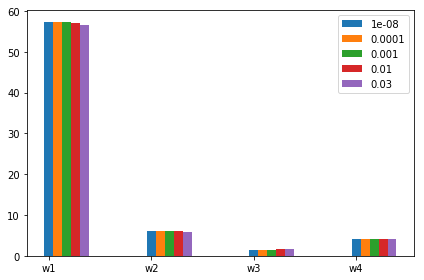

In [12]:
width = 0.35

labels = ['w1', 'w2', 'w3', 'w4']
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = []
for i, w in enumerate(weights):
    rects.append(ax.bar(x+(i*width/len(labels)), w, width/len(labels), label=lambdas[i]))
          
        
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

## 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нельзя, т.к. это совершенно разные операции: одна приводит значения в интервал 0 - 1, другая же приводит их к некоторму среднему.

Вообще, на самом деле, применить обы метода одновременно можно, но это ни к чему не приведёт, а, скорее всего, приведёт к некорректной работе модели.

## 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [13]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [14]:
eval_model_reg1(X_st, y, iterations=3000, alpha=1e-2, lambda_=1e-4)

300 [57.26722288  4.55528163  2.89026296  4.20486994] 40.25690199911283
600 [57.39964041  5.30325488  2.29436339  4.05917041] 39.91469021921101
900 [57.39994928  5.68539638  1.93898752  4.03647986] 39.8206447855194
1200 [57.39995     5.8850499   1.72845329  4.04988932] 39.79164515421839
1500 [57.39995     5.99151699  1.60431305  4.06910179] 39.782340871131034
1800 [57.39995     6.04932096  1.53136117  4.08517469] 39.77928261629544
2100 [57.39995     6.08118587  1.48859484  4.09662703] 39.77826321465926
2400 [57.39995     6.09897287  1.46356838  4.10419257] 39.77792073258739
2700 [57.39995     6.10900167  1.44894197  4.10898232] 39.77780516705782
3000 [57.39995     6.11470092  1.44040178  4.11193613] 39.7777660764615


array([57.39995   ,  6.11470092,  1.44040178,  4.11193613])